# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from math import sqrt

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Importing Spam or Ham Message Dataset

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/mike-ds30/NLP-Project/main/spam.csv", encoding = 'latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
data.columns = ["class", "message"]
data.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


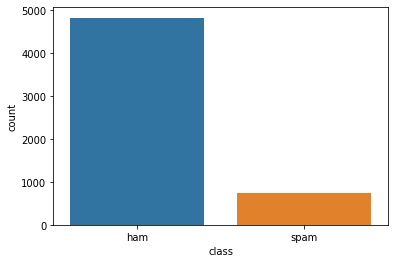

In [ ]:
sns.countplot(x = "class", data = data)

# Text Preprocessing

In [ ]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocessing(message):
  message = message.lower()
  message = re.sub('[^\w\s]', ' ', message)
  message = message.split()
  message = [word for word in message if word not in stopwords.words('english')]
  message = ' '.join(message)
  return message

def remove_numbers(message):
  message = re.sub('[0-9]', ' ', message)
  message = message.split();
  message = [word for word in message if word not in stopwords.words('english')]
  message = ' '.join(message)
  return message

def stem_words(message):
  message = message.split();
  message = [stemmer.stem(word) for word in message]
  message = ' '.join(message)
  return message

def lemmatize_words(message):
  message = message.split();
  message = [lemmatizer.lemmatize(word) for word in message]
  message = ' '.join(message)
  return message

In [ ]:
data["clean message"] = data["message"].apply(preprocessing)
data["clean message"] = data["clean message"].apply(remove_numbers)

In [ ]:
data.head()

,class,message,clean message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


# Text Vectorization

## Bag of Words Representation

In [ ]:
bag_of_words = CountVectorizer(ngram_range = (1, 1))
bag_of_words_representation = bag_of_words.fit_transform(data['clean message'])
X_bag_of_words = pd.DataFrame(data = bag_of_words_representation.toarray(), columns = bag_of_words.get_feature_names_out())
X_bag_of_words

,____,aa,aah,aaniye,aaooooright,aathi,ab,abbey,abdomen,abeg,...,ó_,û_,û_thanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò,ûówell
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Bigram Representation

In [ ]:
#bigram vectorizer
# (2, 2) = Bigram only
bigram = CountVectorizer(ngram_range = (2, 2))
bigram_representation = bigram.fit_transform(data['clean message'])
x_bigram = pd.DataFrame(data = bigram_representation.toarray(), columns = bigram.get_feature_names_out())
x_bigram
# 30185 Bigrams

,____ joy,aa exhaust,aah bless,aah cuddle,aah speak,aaniye pudunga,aaooooright work,aathi dear,aathi love,ab sara,...,ûò address,ûò entertaining,ûò even,ûò favour,ûò getting,ûò hope,ûò indeed,ûò limping,ûò sound,ûówell done
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TF-IDF Representation

In [ ]:
#tf idf vectorizer
tfidf = TfidfVectorizer()
tfidf_representation = tfidf.fit_transform(data['clean message'])
x_tfidf = pd.DataFrame(data = tfidf_representation.toarray(), columns = tfidf.get_feature_names_out())
x_tfidf

,____,aa,aah,aaniye,aaooooright,aathi,ab,abbey,abdomen,abeg,...,ó_,û_,û_thanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò,ûówell
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Splitting into Training and Testing Data

### Training/Testing Data for Bag of Words Representation

In [ ]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bag_of_words, data['class'], test_size = 0.2, stratify = data['class'], shuffle = True, random_state = 30)

In [ ]:
X_train_bow

,____,aa,aah,aaniye,aaooooright,aathi,ab,abbey,abdomen,abeg,...,ó_,û_,û_thanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò,ûówell
3686,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4730,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2303,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1391,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test_bow

,____,aa,aah,aaniye,aaooooright,aathi,ab,abbey,abdomen,abeg,...,ó_,û_,û_thanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò,ûówell
2149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1288,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1612,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2579,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3223,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Training/Testing Data for Bigram Representation

In [ ]:
x_train_bigram, x_test_bigram, y_train_bigram, y_test_bigram = train_test_split(x_bigram, data['class'], test_size = 0.2, stratify = data['class'], shuffle=True, random_state = 30)

In [ ]:
x_train_bigram
# 4457 training data

,____ joy,aa exhaust,aah bless,aah cuddle,aah speak,aaniye pudunga,aaooooright work,aathi dear,aathi love,ab sara,...,ûò address,ûò entertaining,ûò even,ûò favour,ûò getting,ûò hope,ûò indeed,ûò limping,ûò sound,ûówell done
3686,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4730,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2303,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1391,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_test_bigram
# 1115 testing data

,____ joy,aa exhaust,aah bless,aah cuddle,aah speak,aaniye pudunga,aaooooright work,aathi dear,aathi love,ab sara,...,ûò address,ûò entertaining,ûò even,ûò favour,ûò getting,ûò hope,ûò indeed,ûò limping,ûò sound,ûówell done
2149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1288,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1612,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2579,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3223,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Training/Testing Data for TF-IDF Representation

In [ ]:
x_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(x_tfidf, data['class'], test_size = 0.2, stratify = data['class'], shuffle = True, random_state = 30)

In [ ]:
x_train_tfidf

,____,aa,aah,aaniye,aaooooright,aathi,ab,abbey,abdomen,abeg,...,ó_,û_,û_thanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò,ûówell
3686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x_test_tfidf

,____,aa,aah,aaniye,aaooooright,aathi,ab,abbey,abdomen,abeg,...,ó_,û_,û_thanks,ûªm,ûªt,ûªve,ûï,ûïharry,ûò,ûówell
2149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Classification Training

## Bag of Words Representation

### Logistic Regression

In [ ]:
LR_bow = LogisticRegression().fit(X_train_bow, y_train_bow)
y_pred_bow_LR = LR_bow.predict(X_test_bow)

In [ ]:
print(accuracy_score(y_test_bow, y_pred_bow_LR))
print(classification_report(y_test_bow, y_pred_bow_LR))

0.979372197309417
              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       966
        spam       0.96      0.89      0.92       149

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115



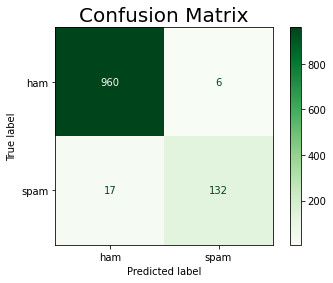

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_bow, y_pred_bow_LR, cmap = 'Greens', labels = LR_bow.classes_)
plt.title("Confusion Matrix", fontsize=20)
plt.show()

### Naive Bayes Classifier

In [ ]:
NB_bow = MultinomialNB().fit(X_train_bow, y_train_bow)
y_pred_bow_NB = NB_bow.predict(X_test_bow)

In [ ]:
print(accuracy_score(y_test_bow, y_pred_bow_NB))
print(classification_report(y_test_bow, y_pred_bow_NB))

0.9730941704035875
              precision    recall  f1-score   support

         ham       0.99      0.97      0.98       966
        spam       0.85      0.97      0.91       149

    accuracy                           0.97      1115
   macro avg       0.92      0.97      0.94      1115
weighted avg       0.98      0.97      0.97      1115



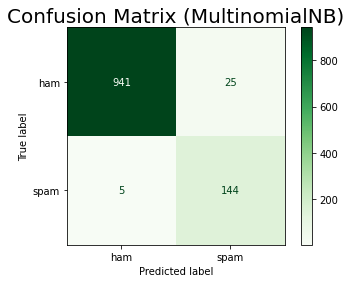

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_bow, y_pred_bow_NB, cmap = 'Greens', labels = NB_bow.classes_)
plt.title("Confusion Matrix (MultinomialNB)", fontsize=20)
plt.show()

In [ ]:
from sklearn.naive_bayes import BernoulliNB
NBber_bow = BernoulliNB().fit(X_train_bow, y_train_bow)
y_pred_bow_NBber = NBber_bow.predict(X_test_bow)
print(accuracy_score(y_test_bow, y_pred_bow_NBber))
print(classification_report(y_test_bow, y_pred_bow_NBber))

0.9811659192825112
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       0.99      0.87      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



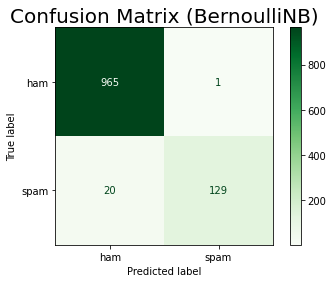

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_bow, y_pred_bow_NBber, cmap = 'Greens', labels = NBber_bow.classes_)
plt.title("Confusion Matrix (BernoulliNB)", fontsize=20)
plt.show()

### K-Nearest Neighbors Classifier

In [ ]:
acc_values = []
k_num = []
for k in range(1, 101, 2):
  KNN_bow = KNeighborsClassifier(n_neighbors = k).fit(X_train_bow, y_train_bow)
  y_pred_bow_KNN = KNN_bow.predict(X_test_bow)
  k_num.append(k)
  acc_values.append(accuracy_score(y_test_bow, y_pred_bow_KNN))

No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

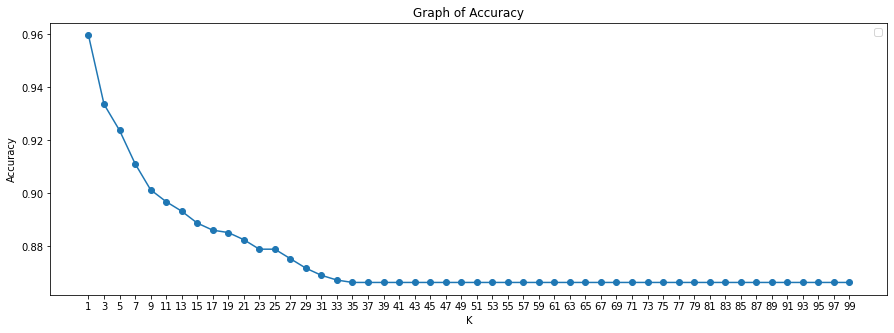

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(k_num, acc_values, "o-")
plt.title("Graph of Accuracy")
plt.xticks(np.arange(1, 101, 2.0))
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend()
plt.show

In [ ]:
KNN_bow = KNeighborsClassifier(n_neighbors = 1).fit(X_train_bow, y_train_bow)
y_pred_bow_KNN = KNN_bow.predict(X_test_bow)

In [ ]:
print(accuracy_score(y_test_bow, y_pred_bow_KNN))
print(classification_report(y_test_bow, y_pred_bow_KNN))

0.9596412556053812
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       966
        spam       1.00      0.70      0.82       149

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115



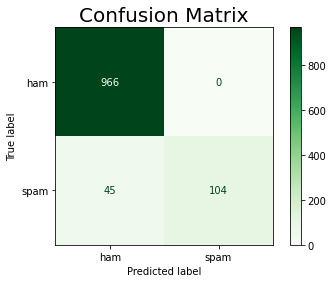

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_bow, y_pred_bow_KNN, cmap = 'Greens', labels = KNN_bow.classes_)
plt.title("Confusion Matrix", fontsize=20)
plt.show()

## Bigram Representation

### Logistic Regression

In [ ]:
# model training
logistic_regression_bigram = LogisticRegression().fit(x_train_bigram, y_train_bigram)
# prediction
logistic_regression_predictions_bigram = logistic_regression_bigram.predict(x_test_bigram)

In [ ]:
print(accuracy_score(y_test_bigram, logistic_regression_predictions_bigram))
print(classification_report(y_test_bigram, logistic_regression_predictions_bigram))

0.9533632286995516
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       966
        spam       1.00      0.65      0.79       149

    accuracy                           0.95      1115
   macro avg       0.97      0.83      0.88      1115
weighted avg       0.96      0.95      0.95      1115



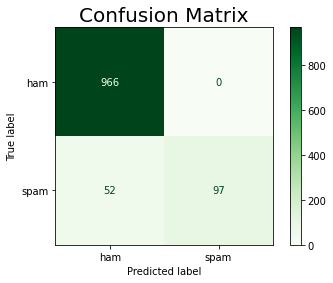

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_bigram, logistic_regression_predictions_bigram, cmap = 'Greens', labels = logistic_regression_bigram.classes_)
plt.title("Confusion Matrix", fontsize=20)
plt.show()

# ~95% Accuracy, ~4.66% false negatives.

### Naive Bayes Classifier

In [ ]:
# model training
naivebayes_bigram = MultinomialNB().fit(x_train_bigram, y_train_bigram)
# prediction
naivebayes_prediction_bigram = naivebayes_bigram.predict(x_test_bigram)

In [ ]:
print(accuracy_score(y_test_bigram, naivebayes_prediction_bigram))
print(classification_report(y_test_bigram, naivebayes_prediction_bigram))

0.8125560538116592
              precision    recall  f1-score   support

         ham       1.00      0.79      0.88       966
        spam       0.41      0.98      0.58       149

    accuracy                           0.81      1115
   macro avg       0.71      0.88      0.73      1115
weighted avg       0.92      0.81      0.84      1115



In [ ]:
from sklearn.naive_bayes import BernoulliNB
naivebayesber_bigram = BernoulliNB().fit(x_train_bigram, y_train_bigram)
naivebayesber_prediction_bigram = naivebayesber_bigram.predict(x_test_bigram)
print(accuracy_score(y_test_bigram, naivebayesber_prediction_bigram))
print(classification_report(y_test_bigram, naivebayesber_prediction_bigram))

0.8816143497757848
              precision    recall  f1-score   support

         ham       0.88      1.00      0.94       966
        spam       0.90      0.13      0.22       149

    accuracy                           0.88      1115
   macro avg       0.89      0.56      0.58      1115
weighted avg       0.88      0.88      0.84      1115



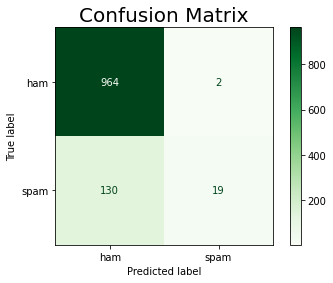

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_bigram, naivebayesber_prediction_bigram, cmap = 'Greens', labels = naivebayesber_bigram.classes_)
plt.title("Confusion Matrix", fontsize=20)
plt.show()

# lots of false negative, ~88.16% Accuracy, ~11.66% false negatives, 0.02% false positives.

### K-Nearest Neighbors Classifier

In [ ]:
# check k = 1 to k = 10 with increments of 2 to avoid even numbers with weights = distance, points weigh more the closer they are to current point.
accuracy = []
ks = []
for k in range(1, 101, 2):
  KNN_bigram = KNeighborsClassifier(n_neighbors = k, weights = "distance").fit(x_train_bigram, y_train_bigram)
  KNN_prediction_bigram = KNN_bigram.predict(x_test_bigram)
  ks.append(k)
  accuracy.append(accuracy_score(y_test_bigram, KNN_prediction_bigram))

No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

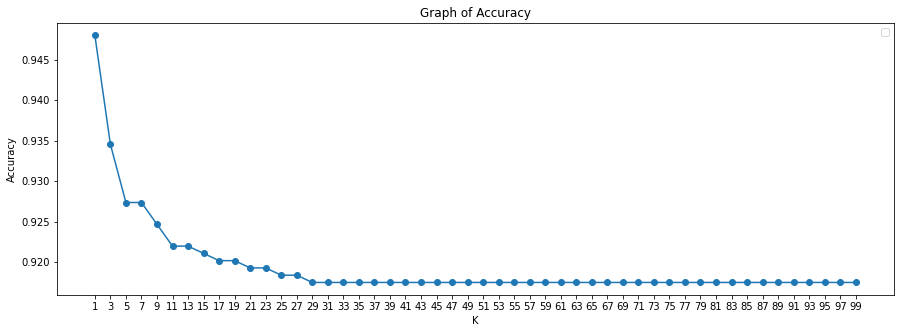

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(ks, accuracy, "o-")
plt.title("Graph of Accuracy")
plt.xticks(np.arange(1, 101, 2.0))
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend()
plt.show

In [ ]:
KNN_bigram = KNeighborsClassifier(n_neighbors = 1, weights = "distance").fit(x_train_bigram, y_train_bigram)
KNN_prediction_bigram = KNN_bigram.predict(x_test_bigram)
print(accuracy_score(y_test_bigram, KNN_prediction_bigram))
# k = 1 and k = 2 produces the same accuracy. ~94% Accuracy

0.9479820627802691


In [ ]:
# check k = 1 to k = 10 with increments of 2 to avoid even numbers with weights = uniform, points weigh the same.
accuracy_2 = []
ks_2 = []
for k in range(1, 101, 2):
  KNN_bigram = KNeighborsClassifier(n_neighbors = k).fit(x_train_bigram, y_train_bigram)
  KNN_prediction_bigram = KNN_bigram.predict(x_test_bigram)
  ks_2.append(k)
  accuracy_2.append(accuracy_score(y_test_bigram, KNN_prediction_bigram))

No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

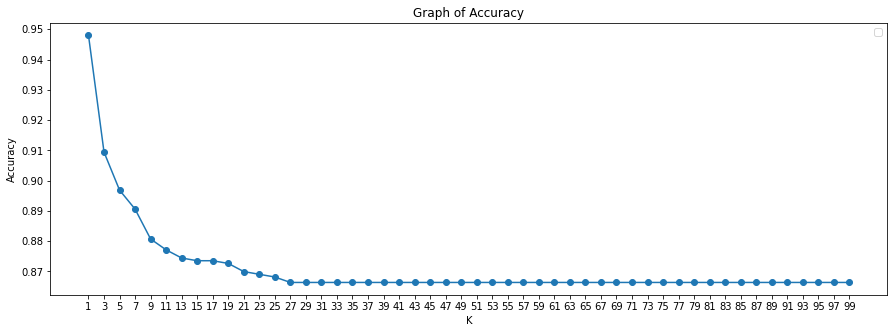

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(ks_2, accuracy_2, "o-")
plt.title("Graph of Accuracy")
plt.xticks(np.arange(1, 101, 2.0))
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend()
plt.show

In [ ]:
KNN_bigram = KNeighborsClassifier(n_neighbors = 1).fit(x_train_bigram, y_train_bigram)
KNN_prediction_bigram = KNN_bigram.predict(x_test_bigram)
print(accuracy_score(y_test_bigram, KNN_prediction_bigram))
# k = 1 is the best and has equal accuracy with the model with uniform point weight. with ~94% Accuracy

0.9479820627802691


In [ ]:

print(accuracy_score(y_test_bigram, KNN_prediction_bigram))
print(classification_report(y_test_bigram, KNN_prediction_bigram))

0.9479820627802691
              precision    recall  f1-score   support

         ham       0.94      1.00      0.97       966
        spam       1.00      0.61      0.76       149

    accuracy                           0.95      1115
   macro avg       0.97      0.81      0.86      1115
weighted avg       0.95      0.95      0.94      1115



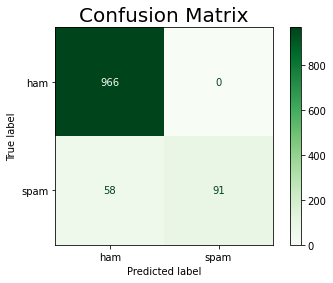

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_bigram, KNN_prediction_bigram, cmap = 'Greens', labels = KNN_bigram.classes_)
plt.title("Confusion Matrix", fontsize=20)
plt.show()

# 94.80% Accuracy, no false positive, some false negatives ~5.20%

In [ ]:
# try k = sqrt(n)
sq = int(sqrt(len(x_train_bigram)))
print(sq)

# sqrt value is 66, even number, try sq+1 and sq-1
KNN_bigram = KNeighborsClassifier(n_neighbors = sq-1).fit(x_train_bigram, y_train_bigram)
KNN_prediction_bigram = KNN_bigram.predict(x_test_bigram)
print(accuracy_score(y_test_bigram, KNN_prediction_bigram))

KNN_bigram = KNeighborsClassifier(n_neighbors = sq+1).fit(x_train_bigram, y_train_bigram)
KNN_prediction_bigram = KNN_bigram.predict(x_test_bigram)
print(accuracy_score(y_test_bigram, KNN_prediction_bigram))

# ~86% Accuracy, not good
# this is actually completely broken, it doesn't predict spam at all. 100% false negatives

66
0.8663677130044843
0.8663677130044843


In [ ]:
print(accuracy_score(y_test_bigram, KNN_prediction_bigram))
print(classification_report(y_test_bigram, KNN_prediction_bigram))

0.8663677130044843
              precision    recall  f1-score   support

         ham       0.87      1.00      0.93       966
        spam       0.00      0.00      0.00       149

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


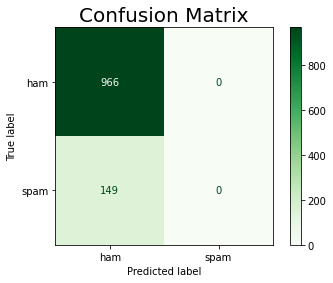

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_bigram, KNN_prediction_bigram, cmap = 'Greens', labels = KNN_bigram.classes_)
plt.title("Confusion Matrix", fontsize=20)
plt.show()

## TF-IDF Representation

### Logistic Regression

In [ ]:
logistic_regression_tfidf = LogisticRegression().fit(x_train_tfidf, y_train_tfidf)
logistic_regression_predictions_tfidf = logistic_regression_tfidf.predict(x_test_tfidf)

In [ ]:
print(accuracy_score(y_test_tfidf, logistic_regression_predictions_tfidf))
print(classification_report(y_test_tfidf, logistic_regression_predictions_tfidf))

0.968609865470852
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       966
        spam       0.97      0.79      0.87       149

    accuracy                           0.97      1115
   macro avg       0.97      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



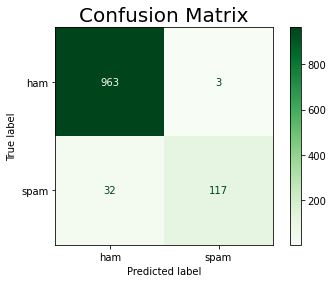

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_tfidf, logistic_regression_predictions_tfidf, cmap = 'Greens', labels = logistic_regression_tfidf.classes_)
plt.title("Confusion Matrix", fontsize=20)
plt.show()

### Naive Bayes Classifier

In [ ]:
naivebayes_tfidf = MultinomialNB().fit(x_train_tfidf, y_train_tfidf)
naivebayes_prediction_tfidf = naivebayes_tfidf.predict(x_test_tfidf)

In [ ]:
print(accuracy_score(y_test_tfidf, naivebayes_prediction_tfidf))
print(classification_report(y_test_tfidf, naivebayes_prediction_tfidf))

0.9757847533632287
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       966
        spam       1.00      0.82      0.90       149

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115



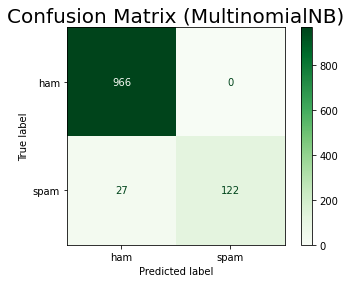

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_tfidf, naivebayes_prediction_tfidf, cmap = 'Greens', labels = naivebayes_tfidf.classes_)
plt.title("Confusion Matrix (MultinomialNB)", fontsize=20)
plt.show()

In [ ]:
from sklearn.naive_bayes import BernoulliNB
naivebayesber_tfidf = BernoulliNB().fit(x_train_tfidf, y_train_tfidf)
naivebayesber_prediction_tfidf = naivebayesber_tfidf.predict(x_test_tfidf)
print(accuracy_score(y_test_tfidf, naivebayesber_prediction_tfidf))
print(classification_report(y_test_tfidf, naivebayesber_prediction_tfidf))

0.9811659192825112
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       0.99      0.87      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



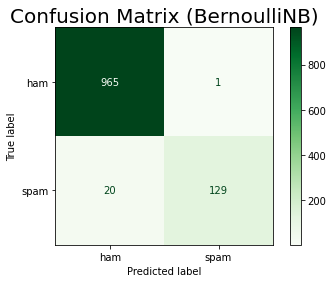

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_tfidf, naivebayesber_prediction_tfidf, cmap = 'Greens', labels = naivebayesber_tfidf.classes_)
plt.title("Confusion Matrix (BernoulliNB)", fontsize=20)
plt.show()

### K-Nearest Neighbors Classifier

In [ ]:
accuracy_3 = []
ks_3 = []
for k in range(1, 101, 2):
  KNN_tfidf = KNeighborsClassifier(n_neighbors = k, weights = "uniform").fit(x_train_tfidf, y_train_tfidf)
  KNN_prediction_tfidf = KNN_tfidf.predict(x_test_tfidf)
  ks_3.append(k)
  accuracy_3.append(accuracy_score(y_test_tfidf, KNN_prediction_tfidf))

No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

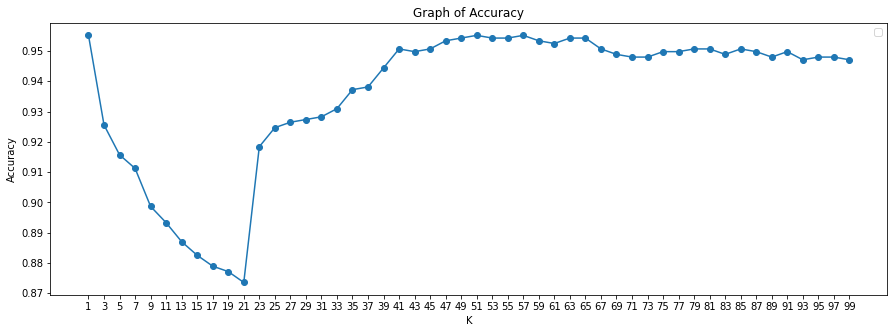

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(ks_3, accuracy_3, "o-")
plt.title("Graph of Accuracy")
plt.xticks(np.arange(1, 101, 2.0))
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend()
plt.show

In [ ]:
accuracy_3 = []
ks_3 = []
for k in range(1, 201, 4):
  KNN_tfidf = KNeighborsClassifier(n_neighbors = k, weights = "distance").fit(x_train_tfidf, y_train_tfidf)
  KNN_prediction_tfidf = KNN_tfidf.predict(x_test_tfidf)
  ks_3.append(k)
  accuracy_3.append(accuracy_score(y_test_tfidf, KNN_prediction_tfidf))

No handles with labels found to put in legend.


<function matplotlib.pyplot.show>

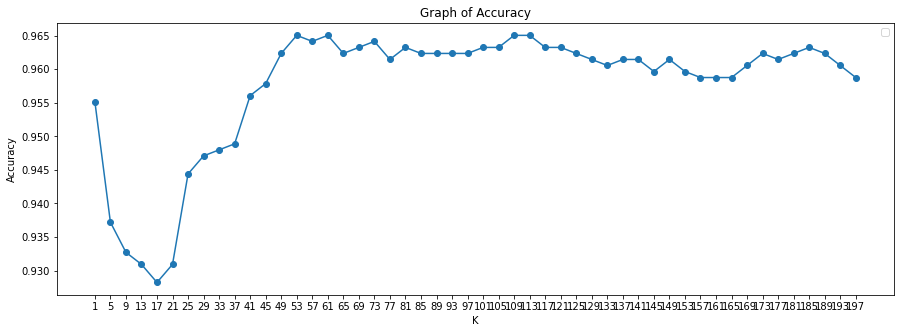

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(ks_3, accuracy_3, "o-")
plt.title("Graph of Accuracy")
plt.xticks(np.arange(1, 201, 4.0))
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.legend()
plt.show

In [ ]:
KNN_tfidf = KNeighborsClassifier(n_neighbors = 49, weights = "distance").fit(x_train_tfidf, y_train_tfidf)
KNN_prediction_tfidf = KNN_tfidf.predict(x_test_tfidf)

In [ ]:
print(accuracy_score(y_test_tfidf, KNN_prediction_tfidf))
print(classification_report(y_test_tfidf, KNN_prediction_tfidf))

0.9623318385650225
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       966
        spam       1.00      0.72      0.84       149

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



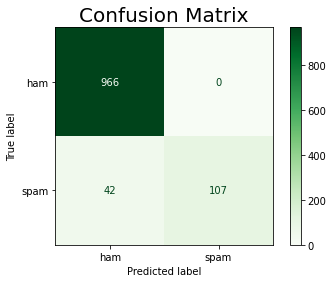

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test_tfidf, KNN_prediction_tfidf, cmap = 'Greens', labels = KNN_tfidf.classes_)
plt.title("Confusion Matrix", fontsize=20)
plt.show()